In [1]:
import os
import tensorflow as tf
import cv2
import numpy as np
import time
import inspect
from keras.utils import to_categorical
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from ggplot import *

/home/him/miniconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/him/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/him/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
data = np.load('data128.npy')
cat_labels = np.load('cat_labels.npy')
filelabel = np.load('filelabel.npy')

In [3]:
print(data.shape, cat_labels.shape)

(8189, 128, 128, 3) (8189, 103)


/home/him/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/him/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


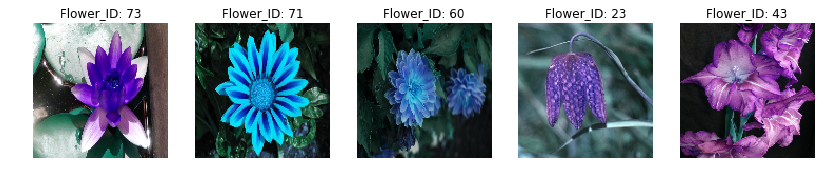

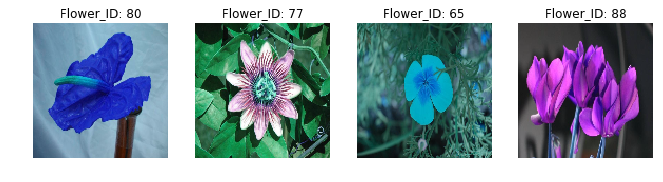

In [4]:
max_counter = 16
counter = 0 
n = 5
done = set()
for i in range(16):
    if counter % n == 0:
        plt.figure(figsize=(14, 6))
    plt.subplot(1, n, counter%n + 1)
    index = random.randint(0, data.shape[0])
    if filelabel[index] not in done:
        done.add(filelabel[index])
        title = 'Flower_ID: ' + str(filelabel[index])
        plt.title(title)
        plt.imshow(data[index])
        plt.axis('off')
        
        counter += 1
        if counter == max_counter:
            break

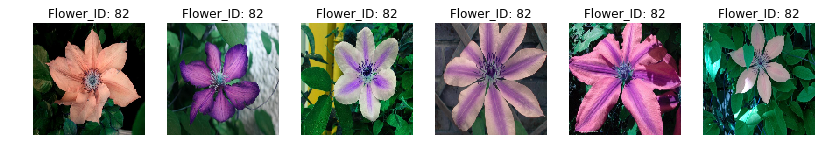

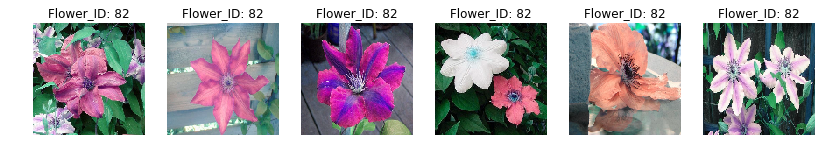

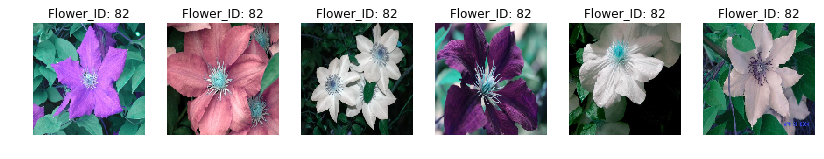

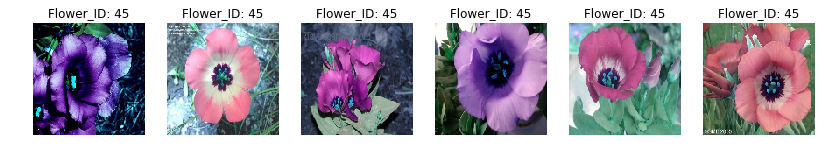

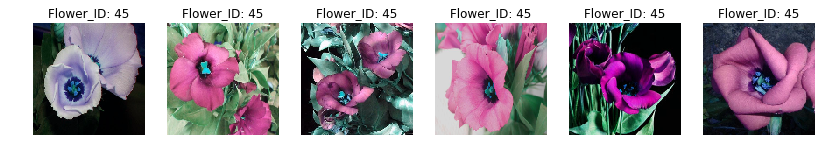

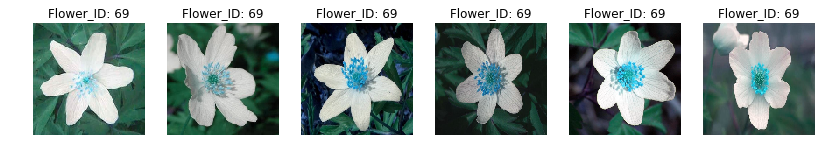

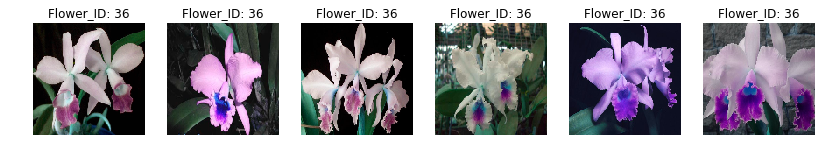

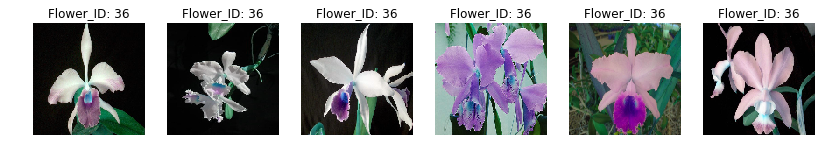

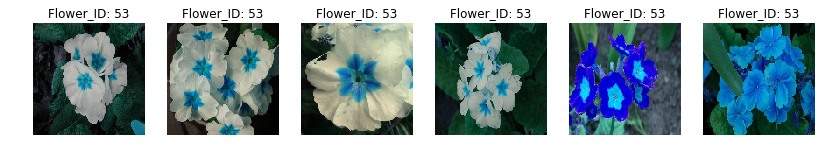

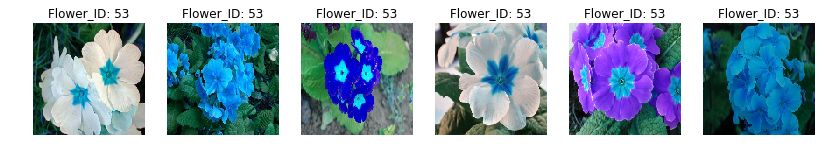

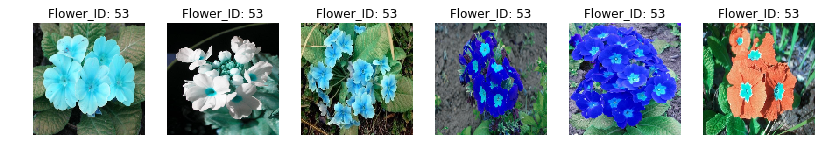

In [5]:
counter = 0
n = 6
done_id = set()
max_counter = 18
for i in range(5):
    fid = random.randint(1,102) 
    indices = np.where(filelabel == fid)[0]
    indices = random.sample(list(indices), max_counter)
    for index in indices:
        if counter % n == 0:
            plt.figure(figsize=(14, 6))
        plt.subplot(1, n, counter%n + 1)
        title = 'Flower_ID: ' + str(filelabel[index])
        plt.title(title)
        plt.imshow(data[index])
        plt.axis('off')

        counter += 1
        if counter == max_counter:
            break

## Trying out tSNE for all and some classes, however didnt get promising results

In [11]:
indices = np.array([],dtype=int)
for i in random.sample(range(1,103), 15):
    ids = np.where(filelabel == i)[0]
    ids = np.array(random.sample(list(ids), 40))
    indices = np.append(indices, ids)

In [12]:
vis_data = data[indices, :]
vis_data = np.reshape(vis_data, (-1, 128*128*3))

In [13]:
pca_200 = PCA(n_components=200)
pca_result_200 = pca_200.fit_transform(vis_data)

print('Cumulative explained variation for 200 principal components: {}'.format(np.sum(pca_200.explained_variance_ratio_)))

Cumulative explained variation for 200 principal components: 0.8761354042053399


In [14]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_200)
print('TSNE Done!')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.003s...
[t-SNE] Computed neighbors for 600 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 4085.073439
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.809433
[t-SNE] Error after 300 iterations: 1.489008
TSNE Done!


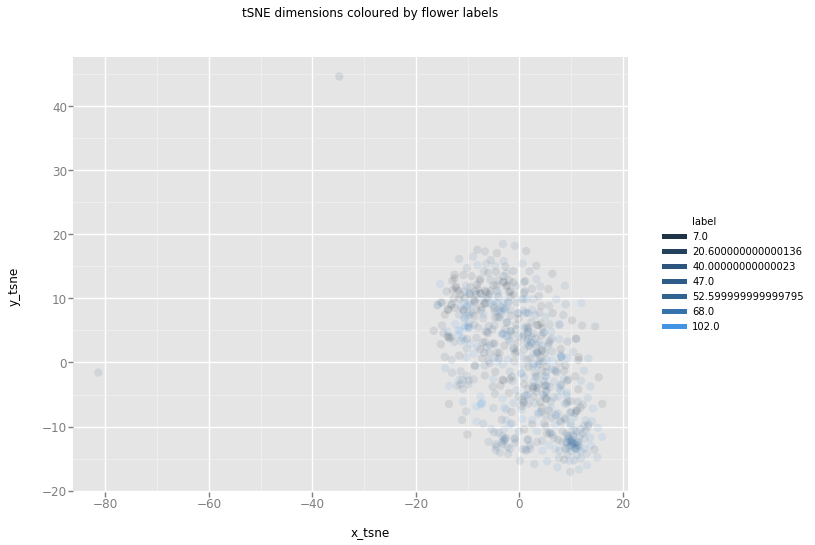

<ggplot: (8757635774058)>

In [15]:
df = pd.DataFrame({'label':filelabel[indices]})
df['x_tsne'] = tsne_results[:,0]
df['y_tsne'] = tsne_results[:,1]
chart = ggplot(df, aes(x='x_tsne', y='y_tsne', colour='label', color='clarity')) + geom_point(size = 70, alpha = 0.1) + \
        ggtitle("tSNE dimensions coloured by flower labels")
chart

Cumulative explained variation for 500 principal components: 0.9863224623834274
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.006s...
[t-SNE] Computed neighbors for 600 samples in 0.329s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 3715.012248
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.090469
[t-SNE] Error after 300 iterations: 1.787924
TSNE Done!


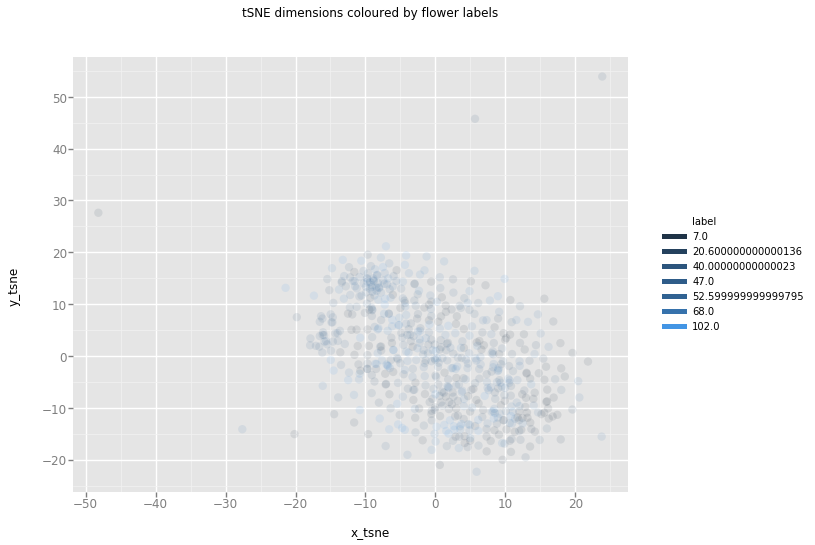

<ggplot: (-9223363279174060351)>

In [17]:
pca_500 = PCA(n_components=500)
pca_result_500 = pca_500.fit_transform(vis_data)

print('Cumulative explained variation for 500 principal components: {}'.format(np.sum(pca_500.explained_variance_ratio_)))

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_500)
print('TSNE Done!')

df = pd.DataFrame({'label':filelabel[indices]})
df['x_tsne'] = tsne_results[:,0]
df['y_tsne'] = tsne_results[:,1]
chart = ggplot(df, aes(x='x_tsne', y='y_tsne', colour='label')) + geom_point(size = 70, alpha = 0.1) + \
        ggtitle("tSNE dimensions coloured by flower labels")

chart